<a href="https://colab.research.google.com/github/JoseGabriel-ITD/MachineLearning/blob/main/Unidad2/Random_Forest_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 3: **Random Forest**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**Random Forest** es un algoritmo de ensamble **basado en múltiples árboles de decisión**. Las principales características son:

- Construye varios árboles (normalmente cientos) y promedia sus resultados.
- Reduce el sobreajuste que puede tener un solo árbol.
- Proporciona mejor generalización que un árbol individual.
- Puede manejar relaciones no lineales y detectar interacciones entre variables.

**Diferencias frente a Regresión Lineal y Árboles de Decisión:**

| Técnica              | Linealidad | Flexibilidad | Overfitting | Interpretabilidad |
|----------------------|------------|--------------|-------------|-------------------|
| Regresión Lineal     | Alta       | Baja         | Baja        | Alta              |
| Árbol de Decisión    | Baja       | Media        | Alta        | Media             |
| Random Forest        | Baja       | Alta         | Baja        | Baja              |

Random Forest es una excelente opción cuando se quiere mejorar la precisión sin preocuparse tanto por la interpretabilidad.


## **1. Cargar datos y librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [2]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar modelo Random Forest**

In [4]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## **5. Evaluar el modelo**

In [8]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Coeficiente de determinación (R²): {r2_rf:.2f}")


Error cuadrático medio (MSE): 9610978.35
Coeficiente de determinación (R²): 0.92


### **Interpretación**
#### **1. MSE / RMSE**

* El RMSE ≈ 3,099 nos dice que, en promedio, las predicciones de precio tienen un error de aproximadamente 3,099.
* Considerando que la mayoría de los autos están entre 8,000 y 16,000, este error representa aproximadamente entre 19% y 40% del precio, lo cual es aceptable pero no óptimo.

#### **2. R² = 0.92**

* El modelo explica el 92% de la variación del precio de los autos.
* Es un muy buen ajuste, especialmente considerando que Random Forest es un modelo robusto y no lineal.
* El RMSE  es ligeramente peor con respecto a arboles ≈ 3,030 vs ≈ 3,099

* El modelo **puede necesitar ajuste de hiperparámetros** (max_depth, min_samples_split, n_estimators...).

* Las variables predictoras pueden tener límite en su capacidad explicativa del precio

## **6. Comparar precios reales vs predichos**

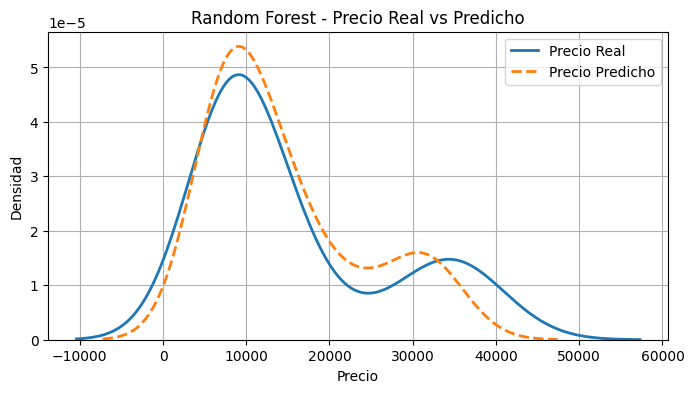

In [9]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_rf, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Random Forest - Precio Real vs Predicho')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()